M. Amintoosi

## High Dimensional Data & the curse of dimensionality

در فضاهای با ابعاد بالا:

* مفهوم محلی بودن کمرنگ می‌شود، ESL
* حجم ابرکره تقریبا صفر است، کتاب زکی
* حجم اصلی فضا در گوشه‌ها هست
* اکثر چگالی کره در پوسته‌ی آن جمع است، کتاب زکی
* با بردارهای با مؤلفه‌های گوسی، بیشتر چگالی نقاط در فاصله خاصی تا مرکز است
* همه بردارهای قطری، عمود بر محورها هستند، کتاب زکی
* بردارهای با مؤلفه‌های گوسی عمود بر هم هستند؟


برای آزمون برخی از اینها باید نقاطی با توزیع یکنواخت در داخل ابرکره تولید کنیم

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

c:\Users\hp\.conda\envs\p310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


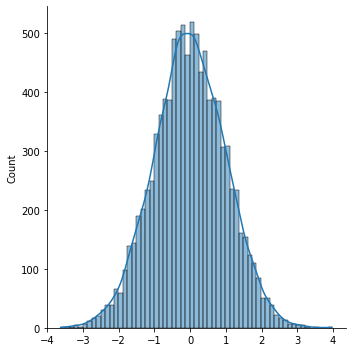

In [2]:
x = np.random.randn(10000)
sns.displot(x, kde=True)

میانگین ایکس صفر هست اما میانگین قدرمطلق ایکس‌ها که اندازه فاصله آنها تا مبدا هست، صفر نیست.

In [3]:
abs_x = np.abs(x)
print(abs_x.mean(), np.sqrt(np.var(x)))
# sns.displot(abs_x, kde=False)

0.7961421610052535 0.9990288495185139


According to [Wiki](https://en.wikipedia.org/wiki/Curse_of_dimensionality): 
most of the volume of the d-cube concentrates near the boundary of a sphere of radius $\sigma \sqrt{d}$

Also according to section **Distance of Points from the Mean** of Chap 6 of Zaki:
whereas the ~~density of the standard multivariate normal is maximized at the center 0~~, most of the probability mass (the points) is concentrated in a small band around the mean distance
of $\sqrt{d}$ from the center.

In [4]:
x = np.random.randn(100, 2)
norm_x = np.linalg.norm(x, axis=1)
print(norm_x.mean(), np.sqrt(2))
# sns.displot(norm_x, kde=False)

1.2446683743912503 1.4142135623730951


In [5]:
x = np.random.randn(10000, 200)
norm_x = np.linalg.norm(x, axis=1)
print(norm_x.mean(), np.sqrt(200))

14.11388489830992 14.142135623730951


برمی‌گردیم به تولید نقاط تصادفی در گوی واحد.

ابتدا تولید نقاط تصادفی با توزیع یکنواخت بر روی دایره.

روش مختصات قطبی قابل تعمیم به فضاهای بالاتر نیست.

نشان می دهیم که اگر داده ها با توزیع نرمال در فضا تولید شده و سپس بر روی کره واحد نگاشت شوند توزیع آنها بر روی سطح کره یکنواخت هست

اگر هر داده را بر نرمش تقسیم کنیم، اندازه‌ی همه داده‌ها یک خواهد شد و روی کره‌ی واحد قرار خواهند گرفت

$$x = (x_1,x_2,\dots,x_d)$$
$$x_i \sim \mathcal{N}(\mu,\sigma^2)$$
$$f(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$
$$\mu=0, \sigma^2=1$$
$$f(x_i) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}x_i^2}$$

$$y=\frac{x}{||x||}$$
وای یک بردار تصادفی یکه با توزیع یکنواخت روی کره واحد است

مطابق روابط ۱.۱۹ و ۱.۲۰ از کتاب زکی تابع چگالی ایکس به صورت زیر است:

Joint probability function  of $x$ is given as:
$$
\begin{aligned}
f(x)&=\prod_{i=1}^d f(x_i)\\
&= \prod_{i=1}^d\frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}x_i^2}
\\ 
&= \left(\frac{1}{\sqrt{2\pi}}\right)^d e^{-\frac{1}{2}\sum_{i=1}^dx_i^2} \\
&= \frac{1}{(2\pi)^{d/2}} e^{-\frac{||x||^2}{2}}
\end{aligned}
$$
یعنی چگالی ففط به اندازه بردار بستگی دارد. پس همه نقاط روی کره‌ی به شعاع مشخص چگالی یکسانی دارند.

دوباره تکه برنامه قبلی رو می‌نویسیم


In [6]:
x = np.random.randn(100, 2)
norm_x = np.linalg.norm(x, axis=1)
print(norm_x.mean(), np.sqrt(2))
# sns.displot(norm_x, kde=False)
x.shape, norm_x[:,np.newaxis].shape

1.3214984988433185 1.4142135623730951


((100, 2), (100, 1))

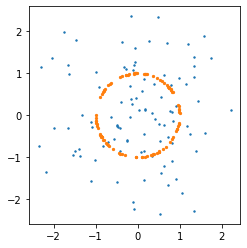

In [7]:
y = x/norm_x[:,np.newaxis]
plt.scatter(x[:,0],x[:,1], 2)
plt.scatter(y[:,0],y[:,1], 5)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

با داشتن اعداد تصادفی با توزیع یکنواخت
 می‌توان با هر توزیعی تولید کرد

## Cumulative Distribution Function
For random variable $X$, its cumulative distribution function (CDF) $F:\mathbb{R} \to [0,1]$,
gives the probability of observing a value at most
some given value $x$: (eq. 1.17 of Zaki)
$$
\large
\begin{aligned}
    F(x) = P(X \le x) \qquad \text{for all } -\infty < x < \infty
\end{aligned}
$$
If $a\sim \mathcal{U}(0,1) \Rightarrow p(a\leq a_0) = a_0$

If we get $X=F^{-1}(a)$, then X has probabilty distribution $F$.
$$
\begin{aligned}
P(X \le x) &= P(F^{-1}(a) \le x) \\
&= P(a \le F(x)) \\
&= F(x) \quad \textrm{Since} \quad a\sim \mathcal{U}(0,1)
\end{aligned}
$$

حالا موارد بالا را امتحان می‌کنیم.
ابتدا برای تولید اعداد تصادفی نرمال با استفاده از توزیع یکنواخت و بعد برای مورد تولید نقاط تصادفی در داخل گوی واحد بدون استفاده از روشی که قبلا بکار برده بودیم یعنی

Rejection Sampling.

 یک تعداد عدد تصادفی از توزیع یکنواخت تولید کرده و سپس با وارون تابع تجمعی توزیع نرمال به توزیع نرمال می‌رسیم

 https://stackoverflow.com/questions/20626994/how-to-calculate-the-inverse-of-the-normal-cumulative-distribution-function-in-p

In [8]:
from statistics import NormalDist # Needs Python >= 3.8
x = np.random.rand(1000)
y = [NormalDist().inv_cdf(a) for a in x]
y = np.array(y)
print(y.mean(), y.var())

0.003184637318125791 1.0144102651349713


c:\Users\hp\.conda\envs\p310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


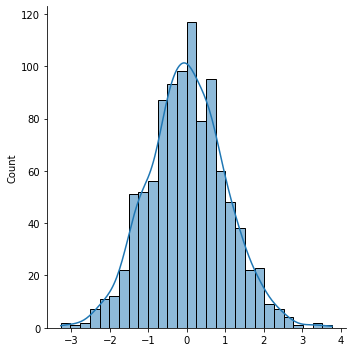

In [9]:
sns.displot(y, kde=True)

## تولید نقاط تصادفی با توزیع یکنواخت در داخل گوی واحد

یک سری نقاط تصادفی که هر مؤلفه‌ی هر نقطه از توزیع گوسی آمده است تولید می‌کنیم، سپس مشابه برنامه بالا هر نقطه را بر اندازه‌اش تقسیم می‌کنیم.

In [10]:
x = np.random.randn(400, 2)
norm_x = np.linalg.norm(x, axis=1)
y = x/norm_x[:,np.newaxis]

قبلا دیدیم که وای‌های فوق نتیجه نگاشت ایکس‌ها بر روی دایره واحد بودند، اگر وای‌ها را در یک رو ضرب کنیم، در داخل دایره واحد جابجا می‌شوند

$$x = (x_1,x_2,\dots,x_d)$$
$$x_i \sim \mathcal{N}(\mu,\sigma^2)$$
$$y=\rho\frac{x}{||x||}, \quad 0\le \rho \le 1$$

اما چگالی نقاط تولید شده در داخل دایره یکنواخت نیست.


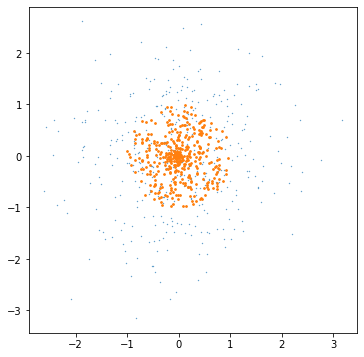

In [11]:
rho = np.random.rand(len(x))
y = rho[:,np.newaxis] * x/norm_x[:,np.newaxis]
plt.figure(figsize=(6, 6))
plt.scatter(x[:,0],x[:,1],.1)
plt.scatter(y[:,0],y[:,1],3)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

قبل از ادامه، یادآوری چند تعریف از کتاب زکی: 

ابتدا ابرکره، رابطه ۶.۱ کتاب زکی

The data hyperspace can be represented as a
$d$-dimensional *hyperball*
centered at $0$ with radius $r$, defined as
$$
  B_d(r) = \bigl\{ x\; |\;\; ||x|| \le r\bigr\}
$$

The surface of the hyperball is called a *hypersphere*,
and it consists of all the points exactly at distance $r$ from
the center of the hyperball
$$
  S_d(r) = \bigl\{ x\; |\;\; ||x|| = r\bigr\}
$$
البته حجم هر دو یکسان هست، رابطه ۶.۱۰ کتاب زکی:
$$
\textrm{Vol}(S_d(r))=K_d r^d
$$
<div dir="rtl">
که در آن 
$k_d$
حجم کره واحد d بعدی هست. 
</div>

$$
\textrm{Vol}(S_d(1))= K_d
$$



اگر قرار باشد چگالی نقاط در همه جا یکسان باشد، رو باید از توزیع دیگری باشد
به نحوی که

$$P(\rho \le r) =  \frac{\textrm{Vol}(S_d(r))}{\textrm{Vol}(S_d(1))}$$
<div dir="rtl">
که در آن،
صورت کسر،
 حجم گوی d بعدی به شعاع r هست
 و مخرج کسر
 حجم گوی واحد.

 و می‌دانیم که
 حجم گوی d بعدی به شعاع r،
 r به توان d برابر حجم گوی واحد هست یعنی:
</div>

$$P(\rho \le r) = \frac{r^d K_d}{K_d} = r^d
$$
<div dir="rtl">
 لذا CDF رو باید به صورت x^d باشد:
</div>

$$ F(x) = x^d$$

<div dir="rtl">
مطابق آنچه در بالاتر دیدیم، برای اینکه رو از همچین توزیعی دربیاد، 
کافیست a را با توزیع یکنواخت تولید کنیم و وارون تابع توزیع تجمعی رو را روی آن اعمال کنیم:
</div>

$a\sim \mathcal{U}(0,1)$

$$\rho = F^{-1}(a) = a ^ {1/d}$$


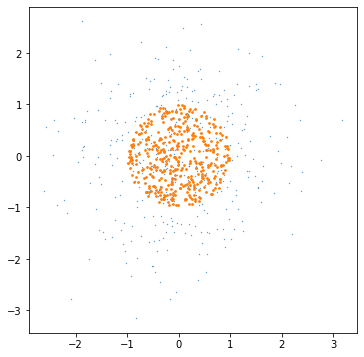

In [12]:
a = np.random.rand(len(x))
d = 2
rho = a**(1/d)
y = rho[:,np.newaxis] * x/norm_x[:,np.newaxis]
plt.figure(figsize=(6, 6))
plt.scatter(x[:,0],x[:,1],.1)
plt.scatter(y[:,0],y[:,1],3)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

We did it :)

تمرینها:
* تخمین حجم ابرکره با روش مونت کارلو
* تخمین نسبت حجم ابرکره به ابرمکعب محیط بر آن
* تخمین نسبت حجم پوسته‌ی به ضخامت اپسیلون به کل ابرکره
* بررسی تقریبا متعامد بودن بردارهای با مؤلفه‌های گوسی در فضاهای با ابعاد بالا